# 1 引言

最近打算开始写一些关于机器学习方面的博客，算是对以往接触过的算法的一个总结，在考虑从哪个算法开始。想了想还是从基础算法开始，例如本文要说的梯度下降。说梯度下降算法是基础中的基础绝不为过，我们必须承认，机器学习中，很多算法都与优化有关，梯度下降算法算是最受欢迎的一类的优化算法，线性回归、逻辑回归、SVM、深度学习等等算法都用到了梯度下降。

# 2 梯度

我们先来分析一个下山问题：假设我们在一座山上，要做的是以最快的速度赶往一个最低的那个山谷，但是我们不知道附近的地形，不知道路线，更不知道海拔最低的山谷在哪。要做到尽快，我们就只能走一步算一步，即每走一步时都选择下降最多的那个方向走，换句话说就是往最陡的方向走，当走到一个位置无论下一步往哪里迈，海拔都不会降低时，我们就认为我们已经到达了我们要去的山谷。

梯度下降算法与这个下山问题求解思路是一样的。

假设存在函数$f(x)$，图像如下图所示，起始点是的初始值，希望找到函数$f(x)$的最小值点。

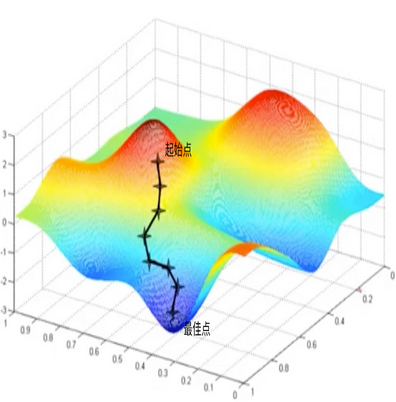

在下山问题中，我们人可以通过视觉或者其他外部感官上的触觉来感知东南西北不同方向的坡度，然后选择最陡的方向，但在函数求最小值问题中，计算机可没有视觉等外部感官，那么怎么来判断那个方向最陡呢？

还记得大学的时候学过（其实高中也学过）的导数知识吗？导数定义如下：

$${f}'(x)=\underset{\Delta x\to 0}{\mathop{\lim }}\,\frac{\Delta y}{\Delta x}=\underset{\Delta x\to 0}{\mathop{\lim }}\,\frac{f({{x}_{0}}+\Delta x)-f({{x}_{0}})}{\Delta x}$$

当然，定义不是关键，关键在于它的的几何意义：函数$f(x)$在$x={{x}_{0}}$处的导数表示在这一点上的切线斜率，换句话说，函数$f(x)$在${{x}_{0}}$处的导数代表着$f(x)$在$x={{x}_{0}}$附近的变化率，也就是导数可以衡量$x$取值在${{x}_{0}}$附近时$f(x)$随$x$变化的快慢。$\left| {f}'(x) \right|$越大，$f(x)$随x变化得越快，函数在图像上表现得越陡峭。

导数解决了一元函数中函数值随自变量变化快慢的问题，但对于多元函数，例如上面3为图像所表示的函数，导数就力有未逮了，这时候我们需要用到偏导的知识：

$$\frac{\partial }{\partial {{x}_{i}}}f({{x}_{0}},{{x}_{1}},\ldots ,{{x}_{n}})=\underset{\Delta x\to 0}{\mathop{\lim }}\,\frac{\Delta y}{\Delta x}=\underset{\Delta x\to 0}{\mathop{\lim }}\,\frac{f({{x}_{0}},\ldots ,xi+\Delta x,\ldots ,{{x}_{n}})-f({{x}_{0}},\ldots ,{{x}_{i}},\ldots ,{{x}_{n}})}{\Delta x}$$

导数与偏导数本质是一致的，但偏导可以衡量除$x$以外其他自变量保持不变时，函数值随xj所在维度变化快慢。分别对不同维度求偏导，我们就可以知道函数$f({{x}_{0}},{{x}_{1}},\ldots ,{{x}_{n}})$在不同维度（方向）变化快慢，从而综合各个方向，获取一个最佳的方向收敛（下山）。

好了，我们现在可以回归到梯度的问题了。什么是梯度呢？函数在某一点的梯度是一个向量，它的方向与取得最大方向导数的方向一致，而它的模为方向导数的最大值。

我们以一元线性回归为例，假设模型为:

$$y=f(x)={{\theta }_{0}}+{{\theta }_{1}}\cdot x$$

此时，${{\theta }_{0}}$和${{\theta }_{1}}$都是未知的，是需要去拟合的参数。当我们初步确定了${{\theta }_{0}}$、${{\theta }_{1}}$的值之后，我们需要定义一个损失函数这对参数${{\theta }_{0}}$和${{\theta }_{1}}$的拟合程度进行衡量，一般用预测值与真实值之间的误差平方和来作为损失函数：

$$J({{\theta }_{0}},{{\theta }_{1}})=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{i}}-{{y}_{i}})}^{2}}}$$

注意，在这个损失函数中，${{x}_{i}}$和${{y}_{i}}$都是已知的值，${{\theta }_{0}}$和${{\theta }_{1}}$才是变量。如果你足够细心的话，你会发现上面的函数表达式中，多了一个$\frac{1}{2}$，这个$\frac{1}{2}$对损失函数$J({{\theta }_{0}},{{\theta }_{1}})$在何处取得最小值并无影响，只是为了后续求导方便而添加的，千万不要纠结这个。作为损失函数，我们要做的就是求出${{\theta }_{0}}$、${{\theta }_{1}}$具体值使$J({{\theta }_{0}},{{\theta }_{1}})$最小。这就可以用上梯度的知识了，$J({{\theta }_{0}},{{\theta }_{1}})$中有两个位置参数，所以，我们需要使用偏导。
然后分别对${{\theta }_{0}}$、${{\theta }_{1}}$求偏导：

$$\frac{\partial J({{\theta }_{0}},{{\theta }_{1}})}{\partial {{\theta }_{0}}}=2\cdot \frac{1}{2m}\sum\limits_{i=1}^{m}{({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{i}}-{{y}_{i}})=}\frac{1}{m}\sum\limits_{i=1}^{m}{(f({{x}_{i}})-{{y}_{i}})}$$

$$\frac{\partial J({{\theta }_{0}},{{\theta }_{1}})}{\partial {{\theta }_{1}}}=2\cdot \frac{1}{2m}\sum\limits_{i=1}^{m}{({{x}_{i}}({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{i}}-{{y}_{i}}))=}\frac{1}{m}\sum\limits_{i=1}^{m}{({{x}_{i}}\cdot (f({{x}_{i}})-{{y}_{i}})})$$

至此，等号右边就没有了未知参数，就是说可以通过计算获取偏导。另外还记得上面说的$\frac{1}{2}$吗，这不就被约去了吗？  

上面的函数只有两个参数，我们继续扩展到$n$个参数的情况，这时候该怎么求偏导（梯度）呢？  

此时函数表达式为：

$$f({{x}_{0}},{{x}_{1}},\ldots ,{{x}_{n}})={{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}$$

损失函数为：

$$J({{x}_{0}},{{x}_{1}},\ldots ,{{x}_{n}})=\frac{1}{2m}\cdot \sum\limits_{i=1}^{m}{{{(f({{x}_{i}})-{{y}_{i}})}^{2}}}=\frac{1}{2m}\cdot \sum\limits_{i=1}^{m}{{{({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}})}^{2}}}$$

求偏导：

$$\begin{align}
  & \frac{\partial J({{\theta }_{0}},{{\theta }_{1}},\ldots ,{{\theta }_{n}})}{\partial {{\theta }_{k}}}=\frac{\partial }{\partial {{\theta }_{k}}}\frac{1}{2m}\sum\limits_{i=1}^{m}{{{({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}})}^{2}}} \\ 
 & =\frac{1}{2m}\sum\limits_{i=1}^{m}{2\cdot ({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}})\cdot }\frac{\partial }{\partial {{\theta }_{k}}}({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}}) \\ 
\end{align}$$

在${{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}}$中，只有${{\theta }_{k}}\cdot {{x}_{k}}$这一项是未知参数，所以对${{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}}$求导时，只会留下${{\theta }_{k}}$，所以上式可以化简为：

$$\begin{align}
  & \frac{\partial J({{\theta }_{0}},{{\theta }_{1}},\ldots ,{{\theta }_{n}})}{\partial {{\theta }_{k}}}=\frac{1}{2m}\sum\limits_{i=1}^{m}{2\cdot ({{\theta }_{0}}+{{\theta }_{1}}\cdot {{x}_{1}}+{{\theta }_{2}}\cdot {{x}_{2}}+\ldots +{{\theta }_{n}}\cdot {{x}_{n}}-{{y}_{i}})\cdot }{{\theta }_{k}} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{(f({{x}_{i}})-{{y}_{i}})\cdot }{{\theta }_{k}} \\ 
\end{align}$$


这就是更一般化的求偏导公式。

# 3 更新梯度

知道怎么求偏导，我们就可以获得在不同位置下的梯度，进一步的，就可以进行梯度更新，还是先以上面说过的一元线性回归为例，假设本次参数初始取值为${{\theta }_{0}}$、${{\theta }_{1}}$，下一次参数取值${{{{\theta }'}}_{0}}$和${{{{\theta }'}}_{1}}$：

$${{{{\theta }'}}_{0}}\text{=}{{\theta }_{0}}\text{-}\beta \frac{\partial J({{\theta }_{0}},{{\theta }_{1}})}{\partial {{\theta }_{0}}}\text{=}{{\theta }_{0}}-\frac{\beta }{m}\sum\limits_{i=1}^{m}{(f({{x}_{i}})-{{y}_{i}})}$$

$${{{{\theta }'}}_{1}}\text{=}{{\theta }_{1}}\text{-}\beta \frac{\partial J({{\theta }_{0}},{{\theta }_{1}})}{\partial {{\theta }_{1}}}\text{=}{{\theta }_{1}}-\frac{\beta }{m}\sum\limits_{i=1}^{m}{({{x}_{i}}(f({{x}_{i}})-{{y}_{i}}))}$$

然后通过上面的两个公式不断迭代更新参数${{\theta }_{0}}$和${{\theta }_{1}}$，直到梯度不在下降，即偏导数为0。用上面的下山问题来说，就是每走一步都计算一下最陡的方向，然后朝这个方向迈一步，然后又计算哪个方向最陡，继续朝这个方向迈步……直到走到一个地方无论朝哪个方向走，海拔都不会降低，那么就认为到了最低的山谷。

那么，上面两个式子中的$\beta$是什么呢？在梯度下降算法中，这个$\beta$被称为学习率，用于控制下降的速度。还是用下山问题来解释，偏导可以告诉我们，哪个方向最陡，而且偏导的大小就意味着朝这个方向迈一步可以走多远，如果你觉得这一步的的距离满足不了你，那么你可以让B大于1，偏导乘以这个$\beta$，那么你一步可以走的更远；如果你觉得下山步子太大危险，你可以让$\beta$处于0和1之间，然后偏导乘以$\beta$，这样一步迈出距离就会小一些。

是不是$\beta$越大越好呢？不是，有句话怎么说来着，步子大了容易扯着蛋，本来一步正常是走1米，你非要一步走1千米，就可能直接从这座山跨到领一座山，直接跃过了山谷，还怎么找山谷。

是不是$\beta$越小越好呢？也不是，$\beta$太小的话，下山太慢，正常一步1米，你非要一步1毫米，几十年也下不了山，另外，如果半山腰处有个小坑洼，如果踩了进去，由于步子太小，无论朝哪个方向迈步，都是上坡，就会以为到了山谷，在函数优化问题上，这就是陷入局部最优。

所以，$\beta$的大小还是要视情况而定。  

更一般化的，我们将上述梯度更新公式应用到更多维的情况。应用到多维上也是一样的，只不过计算量更大，因为每一维度都要先求偏导，然后通过下面公式更新参数：

$${{{{\theta }'}}_{k}}\text{=}{{\theta }_{k}}\text{-}\beta \frac{\partial J({{\theta }_{0}},{{\theta }_{1}})}{\partial {{\theta }_{k}}}\text{=}{{\theta }_{k}}-\frac{\beta }{m}\sum\limits_{i=1}^{m}{({{x}_{k}}(f({{x}_{i}})-{{y}_{i}}))}$$

# 4 总结

本文介绍了梯度下降算法，精髓尽囊括其中。希望对各位读者有所帮助。